Michelle Cronin - Project Question and Cleaned Dataset

## 1) What is the question you hope to answer?

Using several measurable characteristics about a school, can we predict its graduation rate (or, even better, its college readiness index)?

## 2) What data are you planning to use to answer that question?

-

I pulled this data together from several different (often, but not always, overlapping) sources:
- 2013_2014_HS_SQR_Results_2015_03_02.xlsx
- 2014_2015_HS_SQR_Results_2016_01_07.xlsx
- DemographicSnapshot201011to201415Public_FINAL-2.xlsx
- 2015 Graduation_Rates_Public_School-2.xlsx
- DOE_High_School_Directory_2013-2014.csv
- DOE_High_School_Directory_2014-2015.csv
- 2014 Public Data File SUPPRESSED.xlsx
- 2015 Public Data File.xlsx
- Location_Information_Report.csv

## 3) What do you know about the data so far?

Aside from the basic background information, I know some things regarding correlation and missing data.

In [2]:
# import libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('nyc_high_schools_data_more.csv')

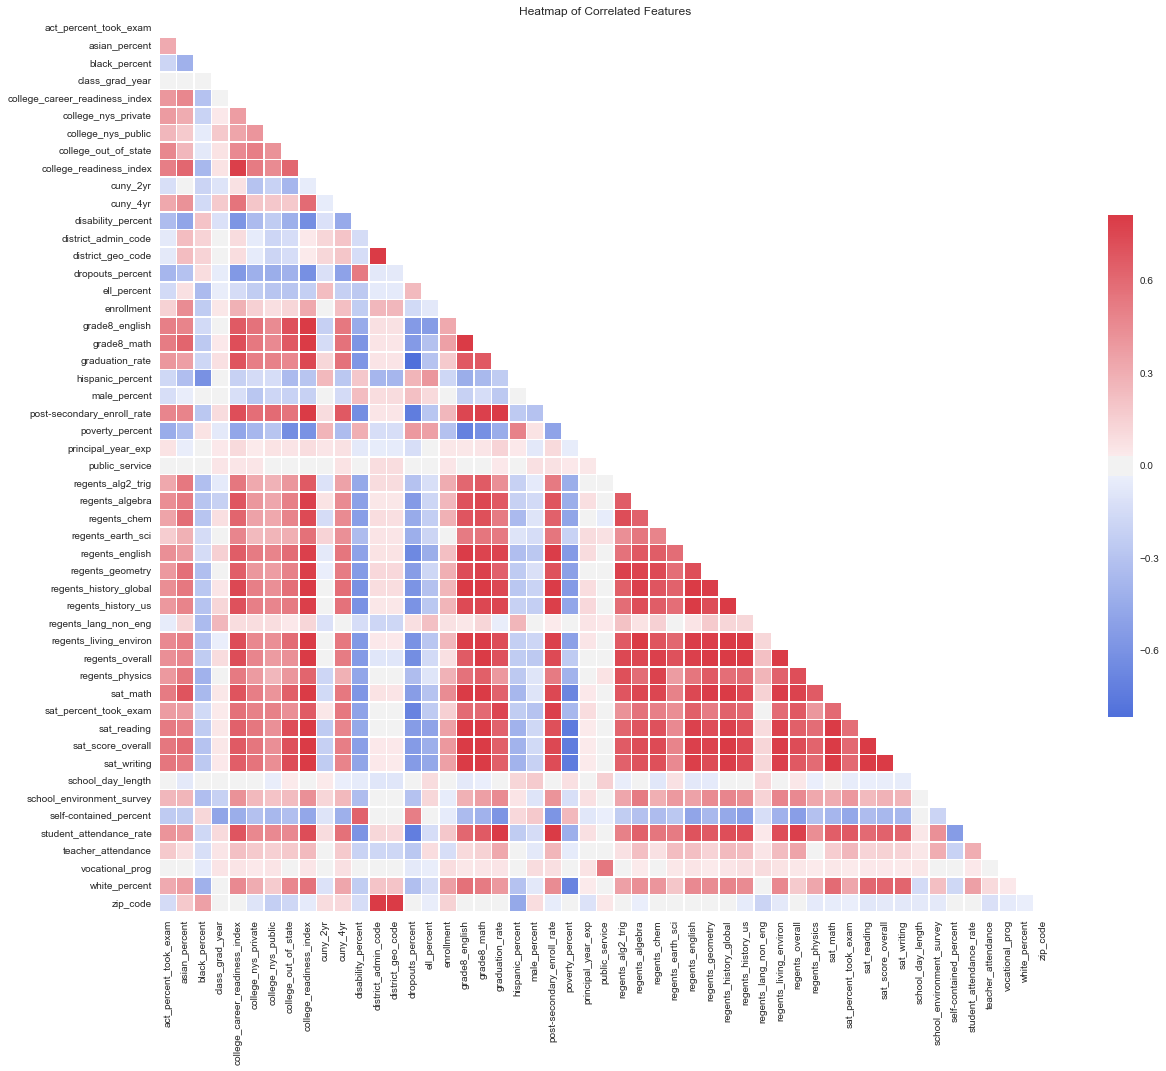

In [7]:
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Heatmap of Correlated Features')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

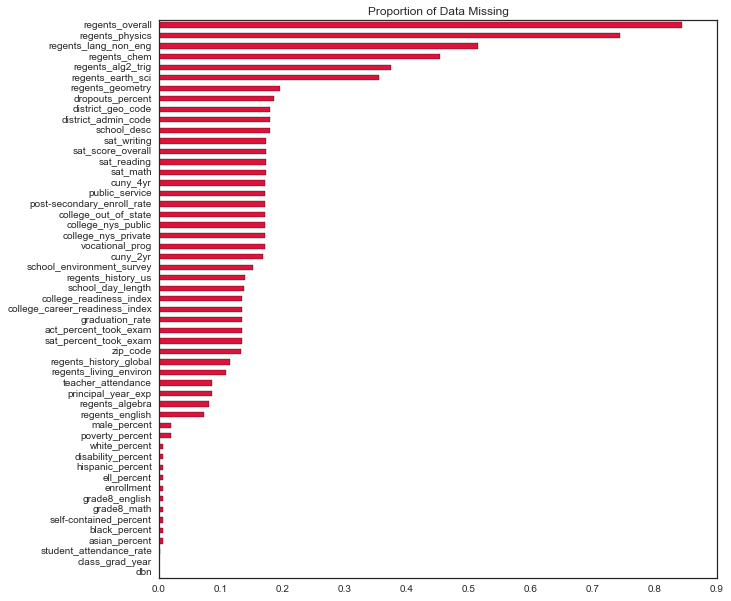

In [4]:
# Show missing data
data.apply(lambda x: sum(x.isnull())*1.0 / len(x)).sort_values().plot(kind='barh', title='Proportion of Data Missing', color='Crimson', figsize=(10,10));

In [8]:
pd.set_option('display.max_columns', 500)
data.head(20)

,act_percent_took_exam,asian_percent,black_percent,class_grad_year,college_career_readiness_index,college_nys_private,college_nys_public,college_out_of_state,college_readiness_index,cuny_2yr,cuny_4yr,dbn,disability_percent,district_admin_code,district_geo_code,dropouts_percent,ell_percent,enrollment,grade8_english,grade8_math,graduation_rate,hispanic_percent,male_percent,post-secondary_enroll_rate,poverty_percent,principal_year_exp,public_service,regents_alg2_trig,regents_algebra,regents_chem,regents_earth_sci,regents_english,regents_geometry,regents_history_global,regents_history_us,regents_lang_non_eng,regents_living_environ,regents_overall,regents_physics,sat_math,sat_percent_took_exam,sat_reading,sat_score_overall,sat_writing,school_day_length,school_desc,school_environment_survey,self-contained_percent,student_attendance_rate,teacher_attendance,vocational_prog,white_percent,zip_code
0,0.000,0.132,0.244,2015,0.333,0.000,0.049,0.016,0.389,0.163,0.066,01M292,0.298,1,1,0.095890,0.127,255,2.18,2.06,0.639,0.566,0.623529,0.262,0.866667,3.0,0,NaN,64,NaN,45,66,58,53,71,NaN,55,NaN,NaN,410,0.597,406,1197,381,420,General Academic,0.77,0.015,0.766,0.971,0,0.039,10002
1,0.133,0.299,0.250,2015,0.675,0.042,0.000,0.014,0.229,0.157,0.169,01M448,0.220,1,1,0.097561,0.194,304,2.27,2.37,0.843,0.411,0.621711,0.507,0.891447,5.5,0,62,64,61,65,69,68,67,69,85,68,NaN,NaN,437,0.699,355,1144,352,420,General Academic,0.87,0.003,0.880,0.971,0,0.033,10002
2,0.216,0.094,0.221,2015,0.386,0.189,0.156,0.100,0.580,0.064,0.144,01M450,0.234,1,1,0.034091,0.018,666,2.66,2.63,0.864,0.579,0.530030,0.722,0.735736,13.8,0,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454,0.852,428,1327,445,420,General Academic,0.92,0.000,0.938,0.961,0,0.083,10009
3,0.040,0.058,0.399,2015,0.208,0.017,0.067,0.017,0.119,0.151,0.083,01M509,0.284,1,1,0.176471,0.091,363,2.28,2.09,0.475,0.512,0.432507,0.300,0.845730,1.9,0,74,61,73,71,69,66,63,79,91,64,NaN,NaN,438,0.356,413,1245,394,450,General Academic,0.81,0.146,0.768,0.971,0,0.025,10002
4,0.262,0.385,0.133,2015,0.992,0.248,0.159,0.195,0.967,0.015,0.168,01M539,0.043,1,1,0.008197,0.002,1735,3.50,3.53,0.975,0.180,0.484726,0.823,0.273199,9.0,0,80,80,80,NaN,91,83,87,91,89,88,NaN,81,657,0.910,601,1859,601,465,General Academic,0.85,0.000,0.952,0.967,0,0.286,10002
5,0.357,0.171,0.172,2015,1.000,0.189,0.140,0.497,0.974,0.008,0.119,01M696,0.011,1,1,0.012987,0.000,545,3.71,3.65,0.974,0.187,0.401835,0.958,0.339450,4.8,0,NaN,73,79,NaN,92,NaN,83,84,NaN,NaN,NaN,NaN,634,0.708,641,1914,639,410,General Academic,0.91,0.000,0.958,0.976,0,0.453,10002
6,0.000,0.012,0.284,2015,0.655,0.024,0.048,0.143,0.207,0.178,0.119,02M047,0.254,2,2,0.034483,0.047,169,2.40,2.24,0.552,0.645,0.355030,0.405,0.834320,7.0,0,NaN,60,NaN,65,67,57,57,70,80,66,NaN,45,NaN,0.483,NaN,NaN,NaN,420,Special Education,0.85,0.083,0.881,0.983,0,0.053,10010
7,NaN,0.057,0.285,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02M135,0.197,NaN,NaN,NaN,0.073,193,2.34,2.22,NaN,0.622,0.430052,NaN,1.000000,2.0,NaN,NaN,62,NaN,70,85,72,71,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410,NaN,NaN,0.010,0.883,0.972,NaN,0.026,10019
8,NaN,0.036,0.249,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02M139,0.295,NaN,NaN,NaN,0.078,193,2.30,2.27,NaN,0.611,0.740933,NaN,0.844560,2.0,NaN,NaN,60,NaN,NaN,NaN,52,NaN,56,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380,NaN,NaN,0.016,0.881,0.988,NaN,0.088,10038
9,NaN,0.072,0.320,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02M280,0.227,NaN,NaN,NaN,0.010,97,2.60,2.43,NaN,0.433,0.515464,NaN,0.670103,1.0,NaN,NaN,66,NaN,NaN,NaN,73,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435,NaN,NaN,0.000,0.937,0.991,NaN,0.155,10038


## 4) Why did you choose this topic?

I chose this topic because I have worked as an education consultant for several years, tutoring the SAT and ACT and helping teenagers get into college. I have also volunteered in this capacity for low-income students. Several articles have come out recently pointing out that although graduation rates in NYC public schools have risen over the years, the rate of students prepared for college has remained low. Thus, NYC public schools are graduating many students each year who are not considered college-ready. Keeping this discrepency in mind, I was interested in taking a more in-depth look at the NYC public education system via data.